# Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
mydata=pd.read_csv('bank-additional-full.csv',sep = ';')
pd.set_option("display.max_columns",50)

## Exploratory Data Analysis (EDA)

In [6]:
mydata.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
 mydata.nunique().sample(10)

education            8
nr.employed         11
job                 12
emp.var.rate        10
housing              3
cons.price.idx      26
marital              4
duration          1544
contact              2
age                 78
dtype: int64

In [8]:
mydata.isnull().sum().head(35)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
mydata.shape

(41188, 21)

In [10]:
mydata.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool>

In [11]:
 mydata["y"].value_counts()
    

no     36548
yes     4640
Name: y, dtype: int64

In [12]:
 mydata["y"].value_counts(normalize=True)*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

In [13]:
mydata["y"].describe()

count     41188
unique        2
top          no
freq      36548
Name: y, dtype: object

## **Univariate and Bivariate Analysis**

## Graph 1: Pairplot is used

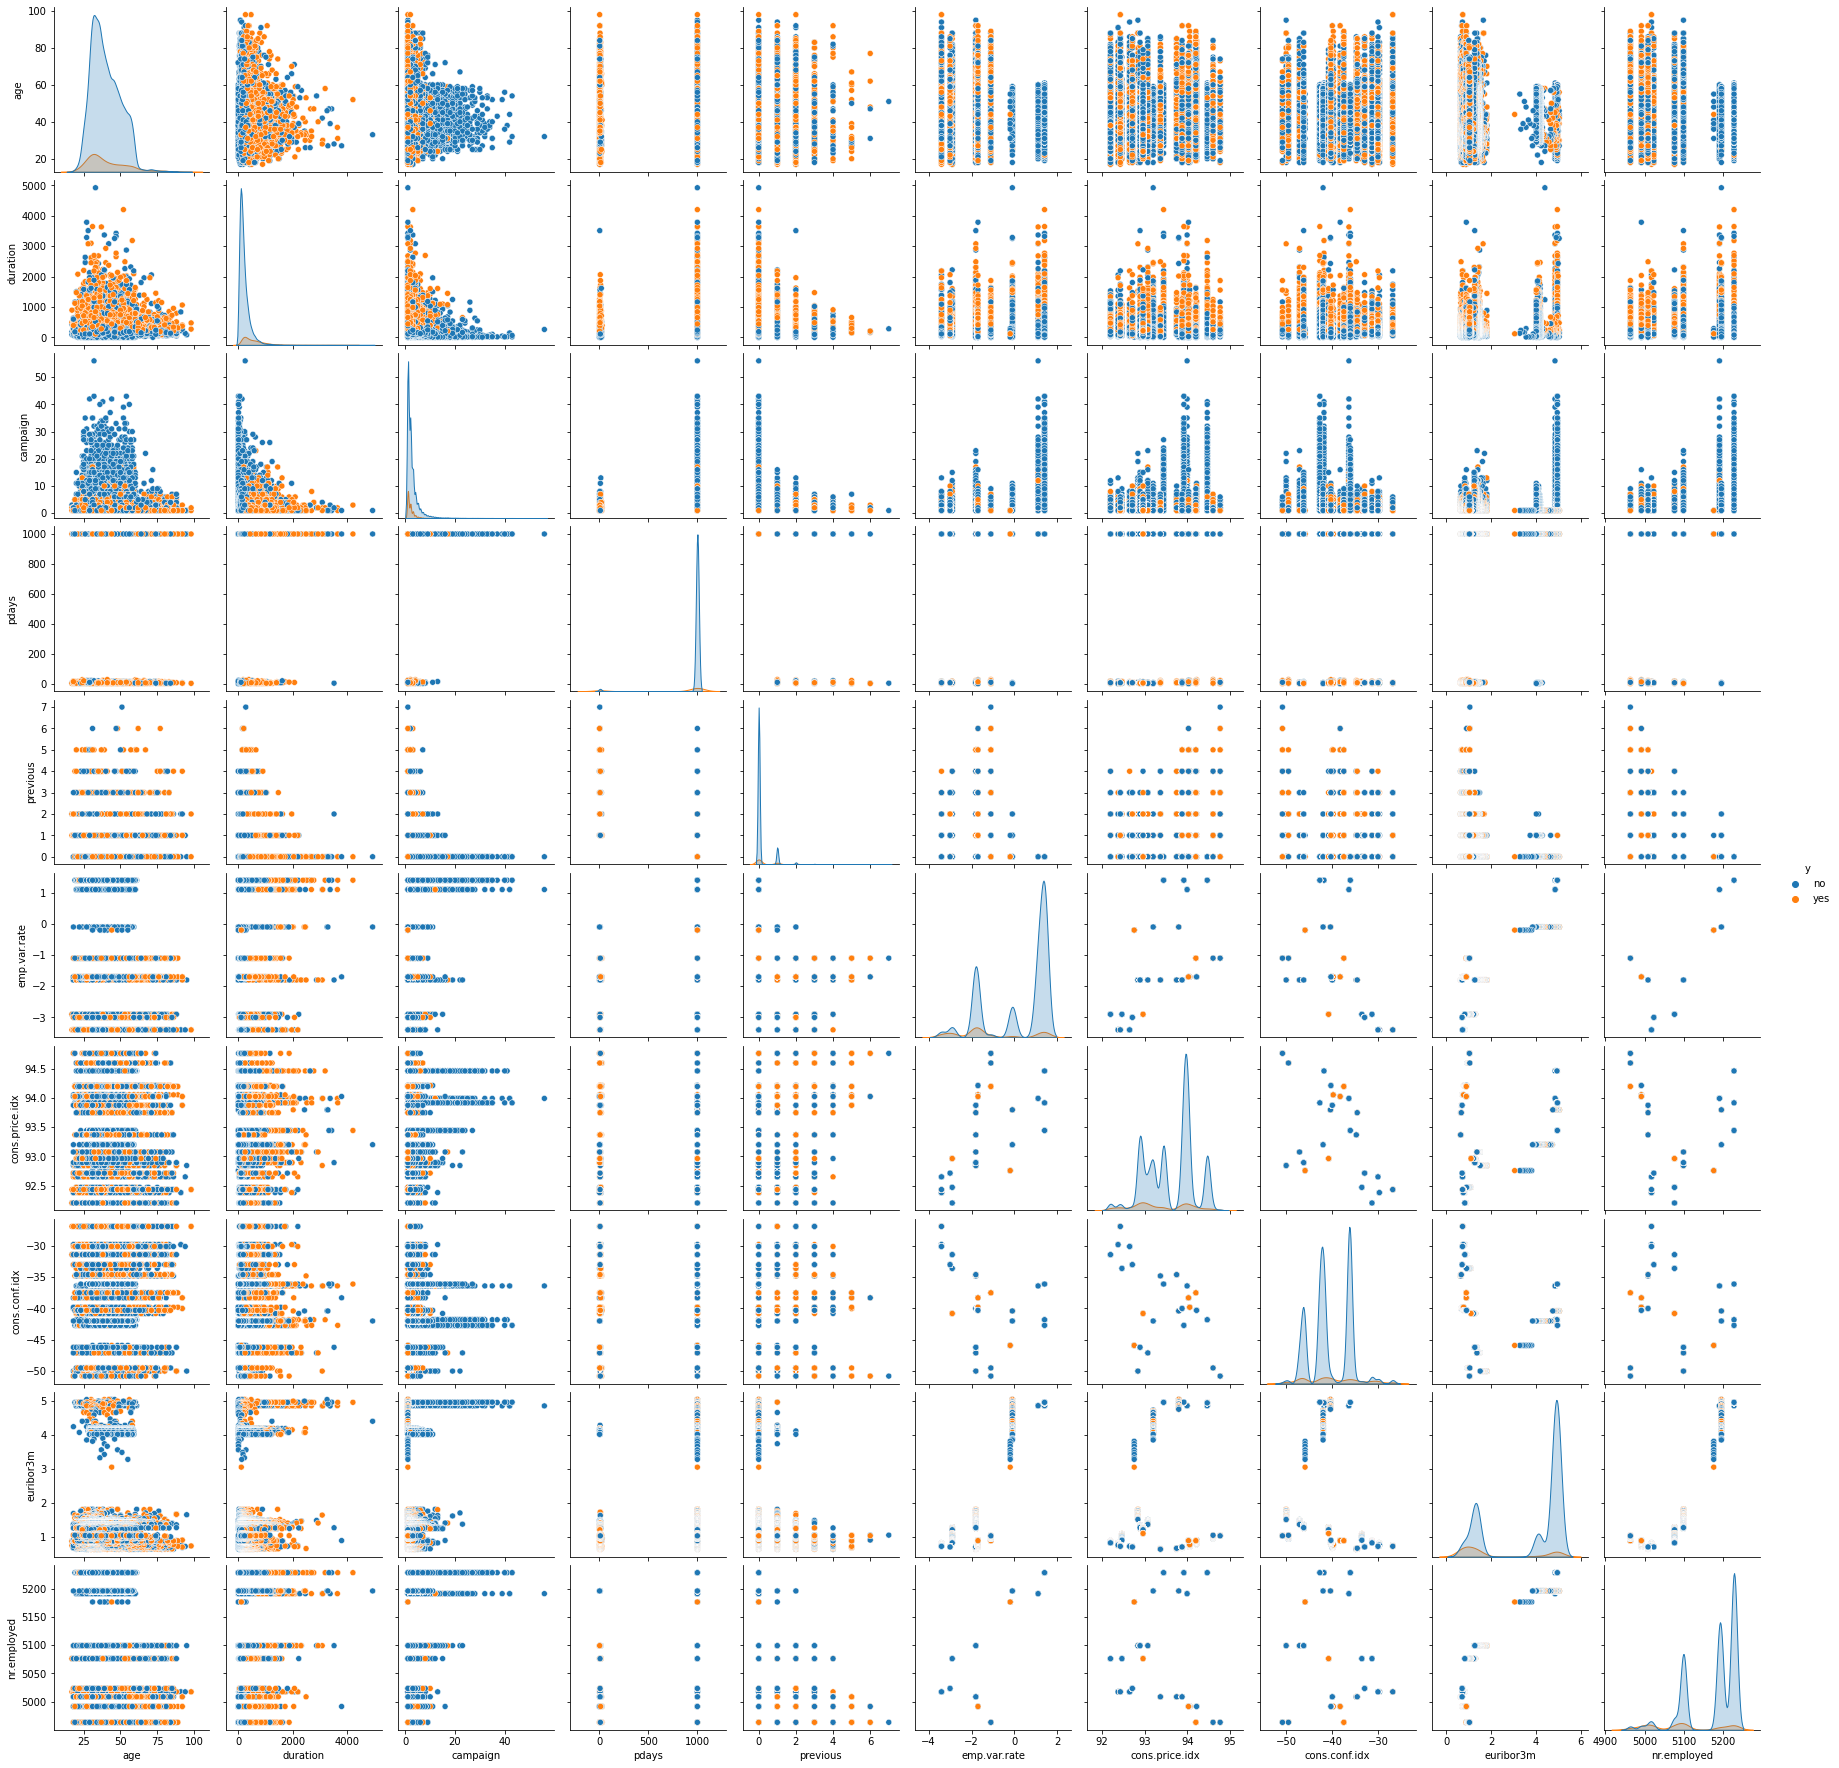

In [14]:
a=sns.pairplot(mydata, kind="scatter" ,hue="y");
a

## Graph 2: Piechart is used

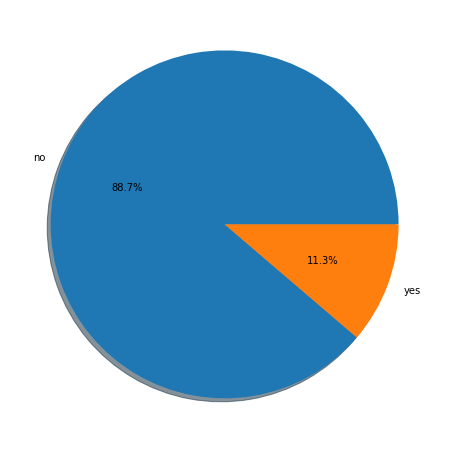

In [15]:
sorted_counts=mydata["y"].value_counts()
plt.figure(figsize=(12,8))
plt.pie(sorted_counts,labels=sorted_counts.index,shadow=True,autopct='%.1f%%')
plt.show()

## Graph 3: subplot is used

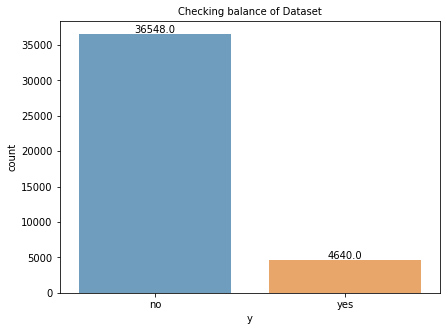

In [16]:
plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
plt.title('Checking balance of Dataset', fontsize=10)
s = sns.countplot(x="y", data=mydata, alpha=0.7)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 4), 
                textcoords = 'offset points')

# Graph 4: lineplot is used

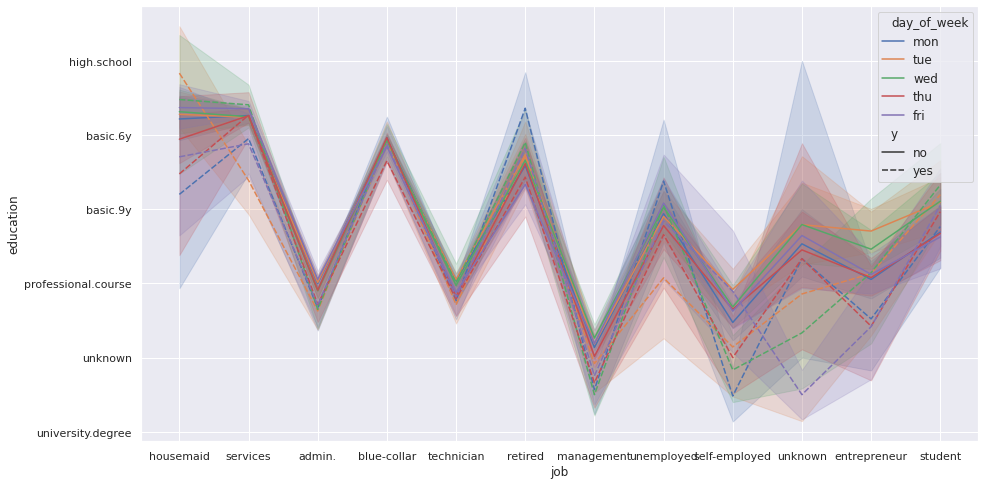

In [17]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x="job", y="education",hue="day_of_week", style="y",data=mydata)
plt.show()

## Graph 5: replot is used

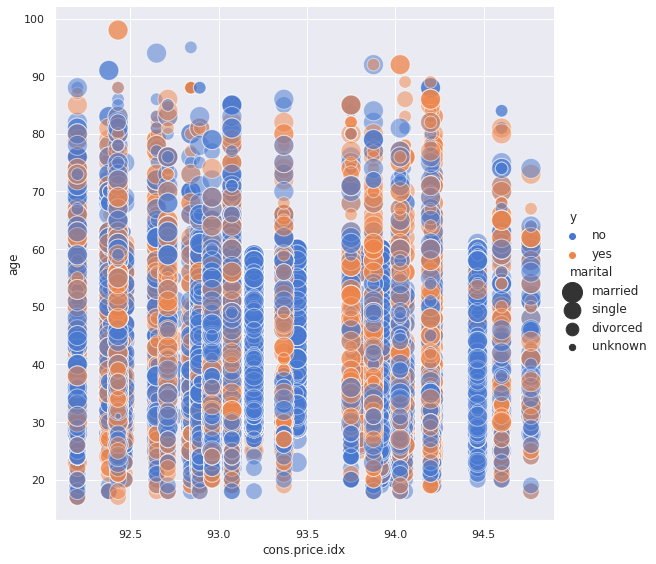

In [18]:
sns.relplot(x="cons.price.idx", y="age", hue="y", size="marital",sizes=(40,400),alpha=.5,palette="muted",height=8,data=mydata)

# label Encoding

In [19]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [20]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in mydata:
    mydata[i] = LE.fit_transform(mydata[i].astype(str).values)

In [21]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             41188 non-null  int64
 1   job             41188 non-null  int64
 2   marital         41188 non-null  int64
 3   education       41188 non-null  int64
 4   default         41188 non-null  int64
 5   housing         41188 non-null  int64
 6   loan            41188 non-null  int64
 7   contact         41188 non-null  int64
 8   month           41188 non-null  int64
 9   day_of_week     41188 non-null  int64
 10  duration        41188 non-null  int64
 11  campaign        41188 non-null  int64
 12  pdays           41188 non-null  int64
 13  previous        41188 non-null  int64
 14  poutcome        41188 non-null  int64
 15  emp.var.rate    41188 non-null  int64
 16  cons.price.idx  41188 non-null  int64
 17  cons.conf.idx   41188 non-null  int64
 18  euribor3m       41188 non-

## Correlation

In [22]:
mydata_corr=mydata.corr()
mydata_corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001235,-0.389814,-0.117894,0.164971,-0.001605,-0.007377,0.007054,-0.024927,-0.017570,0.011812,-0.002296,-0.012289,0.024291,0.019727,0.015171,-0.006061,-0.127919,-0.048040,-0.025658,0.030339
job,0.001235,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,0.008122,-0.003299,-0.022551,0.020965,0.011504,-0.001485,-0.016589,-0.057135,-0.024999,-0.021910,0.025122
marital,-0.389814,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,-0.005108,-0.009880,-0.032479,0.038689,0.001912,-0.038073,-0.055996,0.028307,-0.078735,-0.080046,0.046203
education,-0.117894,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,0.005463,-0.000840,-0.031610,0.038831,0.017009,-0.045154,-0.081128,-0.084738,-0.057508,-0.036666,0.057799
default,0.164971,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,0.000851,0.029700,0.060522,-0.102416,0.023417,0.176656,0.165436,-0.020473,0.192971,0.175014,-0.099352
housing,-0.001605,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.003927,-0.006172,-0.011480,0.021314,-0.011783,-0.063174,-0.078742,0.028543,-0.041340,-0.036002,0.011552
loan,-0.007377,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,-0.000374,0.015360,0.001342,-0.001327,-0.001511,0.003388,-0.001966,0.011559,0.005135,0.005483,-0.004909
contact,0.007054,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,-0.016239,0.052292,0.091952,-0.212848,0.118744,0.346978,0.584524,-0.243212,0.273937,0.175940,-0.144773
month,-0.024927,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,-0.006256,-0.044509,-0.028017,0.103157,-0.065012,-0.395865,-0.006372,0.018749,-0.197147,-0.266983,-0.006065
day_of_week,-0.017570,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,0.001849,-0.056727,-0.009600,-0.004102,0.018732,0.019030,0.002174,-0.035237,0.023488,0.023271,0.015967


## Correlogram

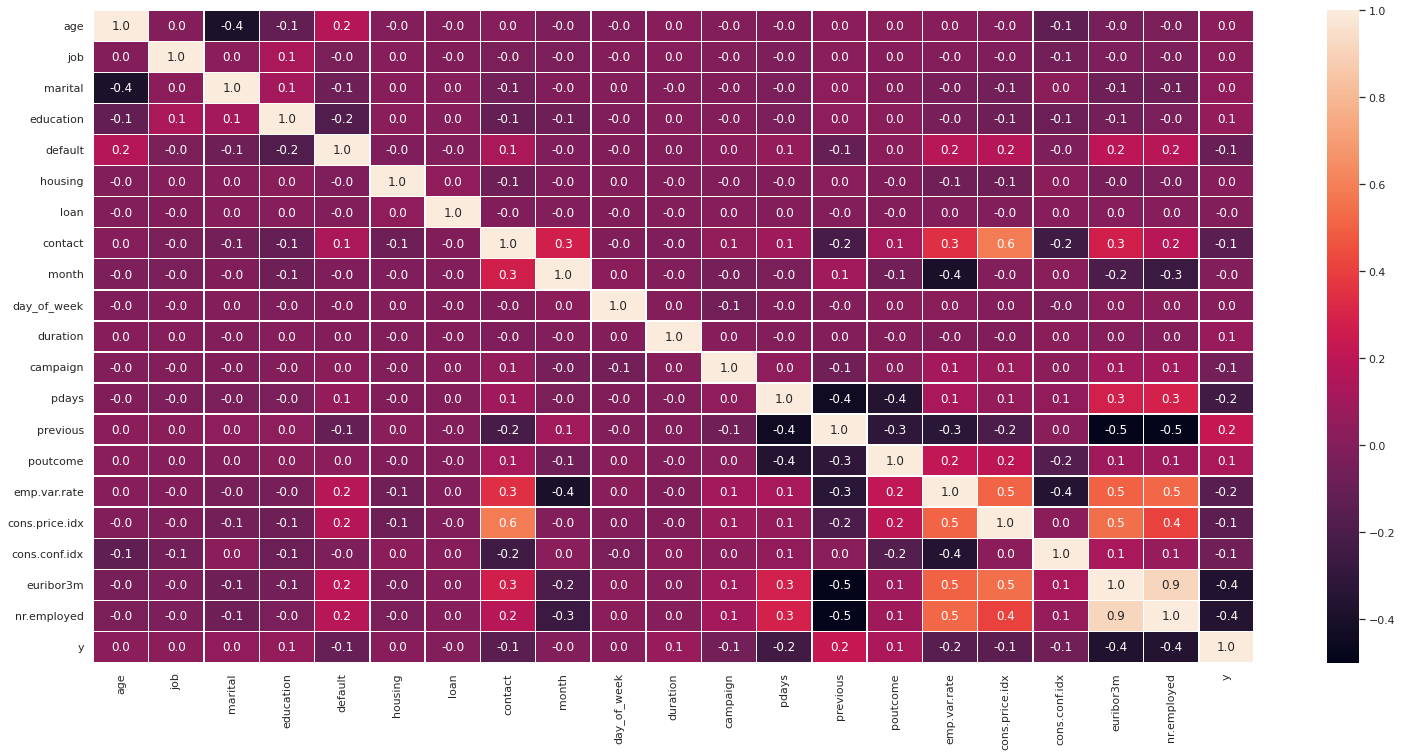

In [23]:

f,ax=plt.subplots(figsize=(26,12))
sns.heatmap(mydata_corr,annot=True ,linewidths=.5, fmt= '.1f',ax=ax)
plt.show()
 

## Seperating the Dependant and Independant Variables

In [24]:
x_ind=mydata.drop("y",axis=1)

In [25]:
y_dep=mydata.y
y_dep

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

## Standardisation

In [26]:
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
xnorm=norm.fit_transform(x_ind)
xnorm

array([[ 1.5334083 , -0.20157925, -0.2837415 , ..., -0.94739573,
         0.45678474,  0.0628044 ],
       [ 1.62938803,  0.91122681, -0.2837415 , ..., -0.94739573,
         0.45678474,  0.0628044 ],
       [-0.29020655,  0.91122681, -0.2837415 , ..., -0.94739573,
         0.45678474,  0.0628044 ],
       ...,
       [ 1.5334083 ,  0.35482378, -0.2837415 , ...,  1.72870087,
        -1.23257369, -3.19614084],
       [ 0.38165155,  1.46762984, -0.2837415 , ...,  1.72870087,
        -1.23257369, -3.19614084],
       [ 3.26104342,  0.35482378, -0.2837415 , ...,  1.72870087,
        -1.23257369, -3.19614084]])

## Model building

## Logistic Regression Model

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xnorm,y_dep,train_size=0.8,random_state=2)

In [28]:
import statsmodels.api as sm

In [29]:
model_stat=sm.Logit(y_train,x_train).fit();

Optimization terminated successfully.
         Current function value: 0.646613
         Iterations 7


In [30]:
model_stat.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: -0.834    
Dependent Variable: y                AIC:              42651.7919
Date:               2022-01-16 17:17 BIC:              42819.8468
No. Observations:   32950            Log-Likelihood:   -21306.   
Df Model:           19               LL-Null:          -11616.   
Df Residuals:       32930            LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1        0.0203     0.0133     1.5250   0.1273   -0.0058    0.0465
x2       -0.0010     0.0117    -0.0881   0.9298   -0.0239    0.0218
x3        0.0257     0.0126     2.0408   0.0413    0.0010    0.0503
x4        0.0227     0.0121     1.8749   0.0608   -0.0010    0.0464
x5       -0.0294     0.0120    -2.4623   0.0138   -0.0529   -0.0060
x6        0.0013     0.0116     0.1164   0.9073   -0.0213    0.0240
x7       -0.0088     0.0115    -0.7630   0.4455   -0.0313    0.0137
x8       -0.1486     0.0175    -8.4854   0.0000   -0.1829   -0.1143
x9       -0.0956     0.0153    -6.2637   0.0000   -0.1256   -0.0657
x10       0.0341     0.0116     2.9501   0.0032    0.0114    0.0567
x11       0.0911     0.0115     7.9381   0.0000    0.0686    0.1136
x12      -0.0205     0.0116    -1.7692   0.0769   -0.0432    0.0022
x13       0.0238     0.0317     0.7522   0.4519   -0.0382    0.0859
x14       0.5176     0.0421    12.3049   0.0000    0.4351    0.6000
x15       0.5450     0.0337    16.1578   0.0000    0.4789    0.6111
x16      -0.0635     0.0198    -3.2108   0.0013   -0.1022   -0.0247
x17       0.2294     0.0224    10.2248   0.0000    0.1854    0.2733
x18      -0.0758     0.0149    -5.0918   0.0000   -0.1049   -0.0466
x19      -0.4331     0.0389   -11.1439   0.0000   -0.5093   -0.3569
x20      -0.1071     0.0349    -3.0666   0.0022   -0.1756   -0.0387
=================================================================

"""

In [31]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [32]:
model1.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred=model1.predict(x_test)

In [34]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,y_pred)

0.9036173828599174

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [37]:
logis_roc_auc=roc_auc_score(y_test,y_pred)
logis_roc_auc

0.609341468921183

In [38]:
fpr,tpr,thresholds=roc_curve(y_test,model1.predict_proba(x_test)[:,1])              #[:,1] - for 1st column (PROBABILITY COLUMN)
                                                                                    #fpr - false positive rate
                                                                                    #tpr- true positive rate

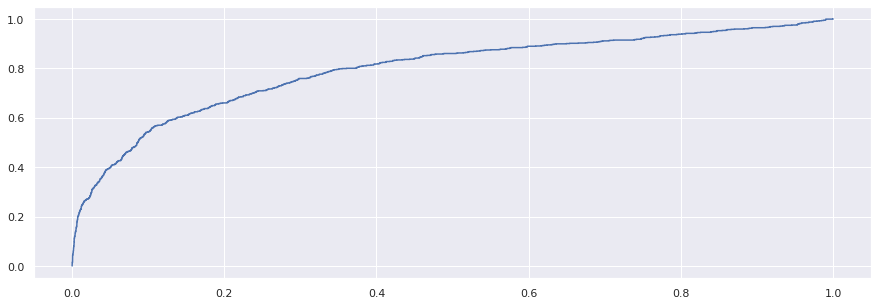

In [39]:
plt.plot(fpr,tpr,logis_roc_auc)

In [40]:
roc_threshold=LogisticRegression(class_weight='balanced')
roc_threshold.fit(x_train,y_train)
THRESHOLD=0.8

In [41]:
y_pred_roc=np.where(roc_threshold.predict_proba(x_test)[:,1]>THRESHOLD,1,0)

In [42]:
y_pred_roc

array([0, 0, 1, ..., 0, 0, 0])

In [43]:
acc_logreg=accuracy_score(y_test,y_pred_roc)

In [44]:
from sklearn.metrics import classification_report

In [45]:
class_report_logistic = classification_report(y_test,y_pred_roc)

In [46]:
print(class_report_logistic)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7318
           1       0.55      0.34      0.42       920

    accuracy                           0.90      8238
   macro avg       0.74      0.65      0.68      8238
weighted avg       0.88      0.90      0.88      8238



# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtmodel = DecisionTreeClassifier()

In [49]:
dtmodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
dtpred = dtmodel.predict(x_test)

In [51]:
accuracy_score(y_test,dtpred)

0.8611313425588735

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
parameters={"max_depth":(10,20,30,40,50,60,70,100),'criterion':('gini','entropy'),'max_features':('log2','auto','sqrt'),
            'min_samples_split':(2,4,6)}

In [54]:
dt=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=parameters,cv=5,random_state=3)

In [55]:
dt.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (10, 20, 30, 40, 50, 60,
                                                      70, 100),
                                        'max_features': ('log2', 'auto',
                                                         'sqrt'),
                                        'min_samples_split': (2, 4, 6)},
                   random_state=3)

In [56]:
dt.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features='auto')

In [57]:
dmodel = DecisionTreeClassifier(max_depth=10, max_features='sqrt')

In [58]:
dmodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt')

In [59]:
dpred = dmodel.predict(x_test)

In [60]:
acc_decisiontree=accuracy_score(y_test,dpred)

In [61]:
class_report_Dtree= classification_report(y_test,dpred)

In [62]:
print(class_report_Dtree)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7318
           1       0.63      0.25      0.36       920

    accuracy                           0.90      8238
   macro avg       0.77      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238



# RandomForest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfmodel = RandomForestClassifier(random_state=3)

In [65]:
rfmodel.fit(x_train,y_train)

RandomForestClassifier(random_state=3)

In [66]:
rfpred = rfmodel.predict(x_test)

In [67]:
accuracy_score(y_test,rfpred)

0.9043457149793639

In [68]:
param={'n_estimators':(200,300,400,500),'max_features':('auto','sqrt','log2'), 'min_samples_split':(2,4,6),'random_state':(0,1,2,3,4,5)}
param

{'max_features': ('auto', 'sqrt', 'log2'),
 'min_samples_split': (2, 4, 6),
 'n_estimators': (200, 300, 400, 500),
 'random_state': (0, 1, 2, 3, 4, 5)}

In [69]:
RF=RandomizedSearchCV(RandomForestClassifier(),param_distributions=param,cv=5,random_state=3)

In [70]:
RF.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6),
                                        'n_estimators': (200, 300, 400, 500),
                                        'random_state': (0, 1, 2, 3, 4, 5)},
                   random_state=3)

In [71]:
RF.best_estimator_

RandomForestClassifier(min_samples_split=6, n_estimators=500, random_state=1)

In [72]:
rmodel = RandomForestClassifier(max_features='sqrt', min_samples_split=6,
                       n_estimators=300, random_state=4)

In [73]:
rmodel.fit(x_train,y_train)

RandomForestClassifier(max_features='sqrt', min_samples_split=6,
                       n_estimators=300, random_state=4)

In [74]:
rpred = rmodel.predict(x_test)

In [75]:
acc_randomforest=accuracy_score(y_test,rpred)

In [76]:
class_report_randomforest = classification_report(y_test,rpred)

In [77]:
 print(class_report_randomforest)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7318
           1       0.67      0.30      0.42       920

    accuracy                           0.91      8238
   macro avg       0.80      0.64      0.68      8238
weighted avg       0.89      0.91      0.89      8238



# GradientBoosting

In [78]:
import xgboost as xgb

In [79]:
xgmodel = xgb.XGBClassifier()

In [80]:
xgmodel.fit(x_train,y_train)

XGBClassifier()

In [81]:
xgpred = xgmodel.predict(x_test)

In [82]:
acc_gbc=accuracy_score(y_test,xgpred)

# KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
mydata.shape

(41188, 21)

In [85]:
np.sqrt(3424)

58.51495535331117

In [86]:
knn = KNeighborsClassifier(n_neighbors=59,p=2,metric='euclidean')

In [87]:
kmodel = knn.fit(x_train,y_train)

In [88]:
kpred = kmodel.predict(x_test)

In [89]:
acc_knn=accuracy_score(y_test,kpred)

In [90]:
class_report_knn = classification_report(y_test,kpred)

In [91]:
 print(class_report_knn)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7318
           1       0.70      0.23      0.35       920

    accuracy                           0.90      8238
   macro avg       0.81      0.61      0.65      8238
weighted avg       0.89      0.90      0.88      8238



# SVM

In [92]:
from sklearn.svm import SVC

In [93]:
model = SVC(kernel='linear')

In [94]:
f_model=model.fit(x_train,y_train)

In [95]:
svm_pred = model.predict(x_test)
svm_pred

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
acc_svc=accuracy_score(y_test,svm_pred)

In [97]:
f_model.n_support_

array([6826, 3537], dtype=int32)

In [98]:
kernel=['linear','rbf','poly','sigmoid']

In [99]:
for i in kernel:
    model1=SVC(kernel=i)
    model1=model1.fit(x_train,y_train)
    print('kernel:',i)
    print('Accuracy Score:',accuracy_score(y_test,model1.predict(x_test)))

kernel: linear
Accuracy Score: 0.8991260014566642
kernel: rbf
Accuracy Score: 0.9036173828599174
kernel: poly
Accuracy Score: 0.9032532168001942
kernel: sigmoid
Accuracy Score: 0.8514202476329206


## Model score

In [100]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree', 'XGBoosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest,acc_decisiontree,
              acc_gbc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,XGBoosting Classifier,0.905802
3,Random Forest,0.905681
1,KNN,0.903375
4,Decision Tree,0.900340
0,Support Vector Machines,0.899126
2,Logistic Regression,0.895849
